In [1]:
import matplotlib.image
import matplotlib.pyplot
import math
import numpy as np
# matplotlib.pyplot.ioff()

In [2]:
num_beliefs = 17

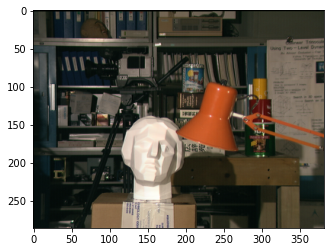

In [3]:
input_left = matplotlib.image.imread('tsukuba-imL.png')
matplotlib.pyplot.imshow(input_left)

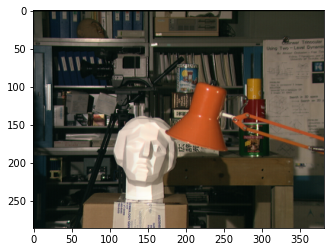

In [4]:
input_right = matplotlib.image.imread('tsukuba-imR.png')
matplotlib.pyplot.imshow(input_right)

In [5]:
height = input_left.shape[0]
width = input_left.shape[1]

In [6]:
base_beliefs = np.ones(shape=(height, width, num_beliefs), dtype=np.float32)

In [7]:
for b in range(num_beliefs):
    left_slice = input_left[:,num_beliefs-1:]
    right_slice = input_right[:, num_beliefs-1-b:width-b]
    norm = np.linalg.norm(left_slice-right_slice, axis=2)
    np.negative(norm, out=norm)
    np.exp(norm, out=norm)
    base_beliefs[:, num_beliefs-1:,b] = norm

In [8]:
base_beliefs[:,:] *= (1 / np.sum(base_beliefs[:,:],axis=2)[:,:, np.newaxis])

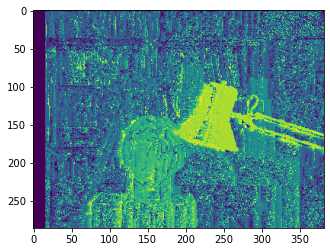

In [9]:
most_likely = np.argmax(base_beliefs[:,:], axis=2)
matplotlib.pyplot.imshow(most_likely)

In [10]:
def smoothfunc(d):
    d = abs(d)
    return math.exp(-(d**2))
def howsmooth(a,b,threshold=0.1):
    if smoothfunc(a-b) > threshold:
        return smoothfunc(a-b)
    else:
        return threshold

In [11]:
smoothness = np.ndarray(shape=(num_beliefs, num_beliefs), dtype=np.float32)
for a in range(num_beliefs):
    for b in range(num_beliefs):
        smoothness[a][b] = howsmooth(a,b)

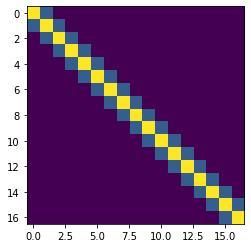

In [12]:
matplotlib.pyplot.imshow(smoothness)

In [13]:
RIGHT=0
UP = 1
LEFT = 2
DOWN = 3
BASE = 4
DIRECTIONS = {"right": RIGHT, "up":UP, "left":LEFT, "down": DOWN, "base": BASE}

In [14]:
data = np.ones( shape = (height, width, 5, num_beliefs),
                dtype = np.float32)
data /= num_beliefs

In [15]:
working = np.ones( shape = (height, width, 4, num_beliefs, num_beliefs),
                   dtype = np.float32)
working /= num_beliefs

In [16]:
beliefprod = np.ndarray( shape = (height, width, num_beliefs),
                         dtype = np.float32)
belief = np.ndarray( shape = (height, width),
                     dtype = int )

In [17]:
sumstorage = np.ndarray( shape = (height, width),
                         dtype = np.float32)

In [18]:
data[:,:,DIRECTIONS["base"],:] = base_beliefs * (1/np.sum(base_beliefs, axis=2, keepdims=True))

In [19]:
smoothness /= np.sum(smoothness,axis=1, keepdims=True)

In [20]:
howmany = 40

In [21]:
def pass_messages(direction):
    if direction == RIGHT:
        working_slice = working[:,:-1, RIGHT]
        from_slice = data[:,:-1]
        to_slice = data[:, 1:]
        from_dir = LEFT
        to_dir = RIGHT
        storage = sumstorage[:, 1:]
    elif direction == UP:
        working_slice = working[1:, :, UP]
        from_slice = data[1:,:]
        to_slice = data[:-1, :]
        from_dir = DOWN
        to_dir = UP
        storage = sumstorage[:-1, :]
    elif direction == LEFT:
        working_slice = working[:, 1:, LEFT]
        from_slice = data[:,1:]
        to_slice = data[:, :-1]
        from_dir = RIGHT
        to_dir = LEFT
        storage = sumstorage[:,:-1]
    elif direction == DOWN:
        working_slice = working[:-1, :, DOWN]
        from_slice = data[:-1, :]
        to_slice = data[1:, :]
        from_dir = UP
        to_dir = DOWN
        storage = sumstorage[1:, :]
    else:
        raise Exception("invalid direction index: %s" % direction)
        
    working_slice[:] = smoothness 
 
    working_slice[:] *= from_slice[:,:, BASE,:,np.newaxis]
    for d in (RIGHT,UP, LEFT, DOWN):
        if d == to_dir: 
            continue
        working_slice[:] *= from_slice[:,:,d,np.newaxis,:]
    np.sum(working_slice, axis=3, out=to_slice[:,:,from_dir])
    
    np.sum(to_slice[:,:,from_dir], axis=2, out=storage)
    np.reciprocal(storage, out=storage)
    to_slice[:,:,from_dir] *= storage[:,:,np.newaxis]
        

def calc_belief():
    data.prod(axis=2, out=beliefprod)
    beliefprod.argmax(axis=2, out=belief)
    return belief
    

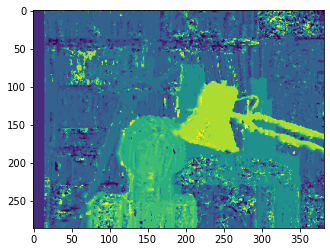

<Figure size 432x288 with 0 Axes>

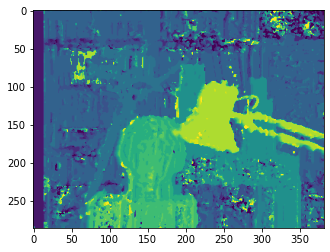

<Figure size 432x288 with 0 Axes>

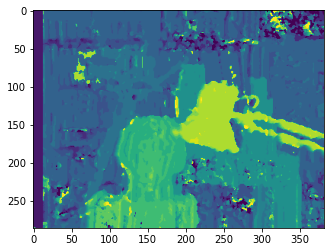

<Figure size 432x288 with 0 Axes>

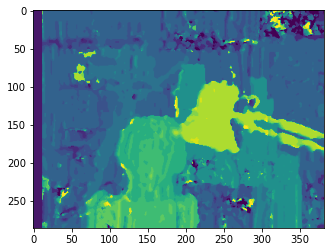

<Figure size 432x288 with 0 Axes>

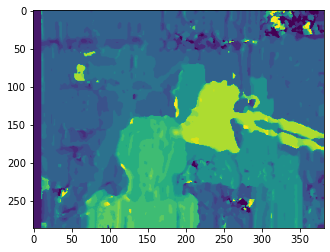

<Figure size 432x288 with 0 Axes>

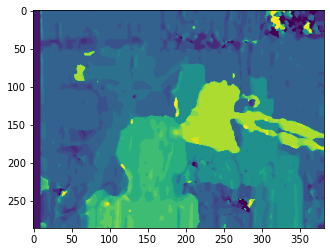

<Figure size 432x288 with 0 Axes>

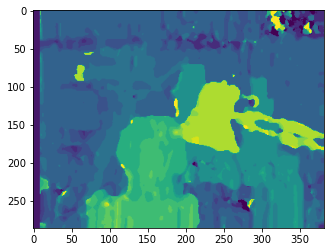

<Figure size 432x288 with 0 Axes>

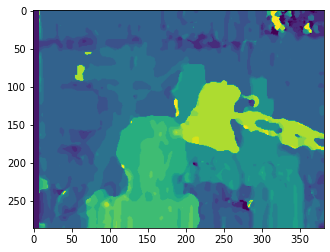

<Figure size 432x288 with 0 Axes>

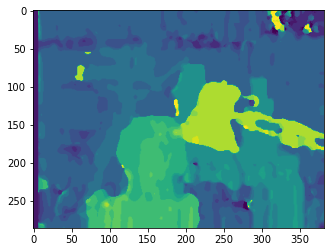

<Figure size 432x288 with 0 Axes>

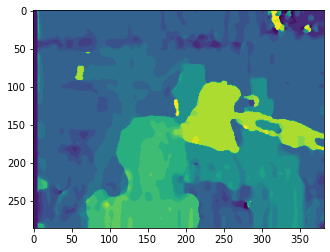

<Figure size 432x288 with 0 Axes>

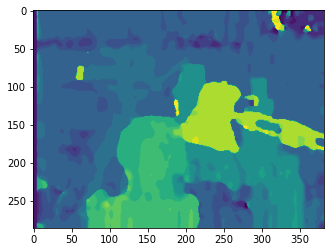

<Figure size 432x288 with 0 Axes>

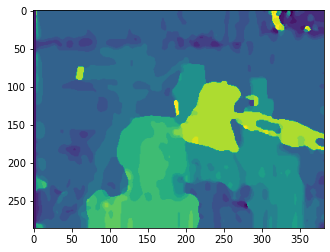

<Figure size 432x288 with 0 Axes>

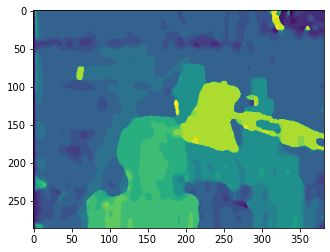

<Figure size 432x288 with 0 Axes>

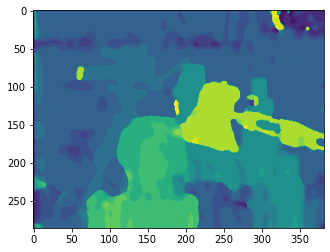

<Figure size 432x288 with 0 Axes>

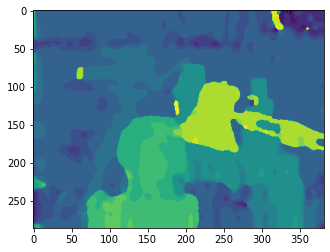

<Figure size 432x288 with 0 Axes>

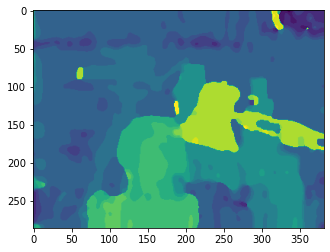

<Figure size 432x288 with 0 Axes>

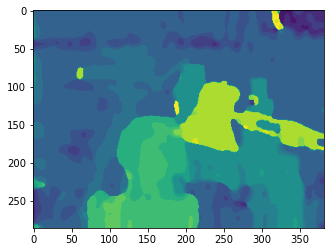

<Figure size 432x288 with 0 Axes>

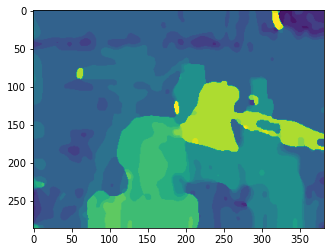

<Figure size 432x288 with 0 Axes>

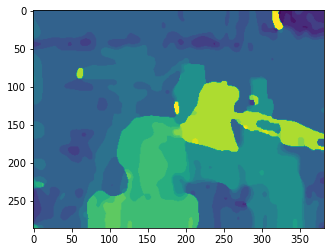

<Figure size 432x288 with 0 Axes>

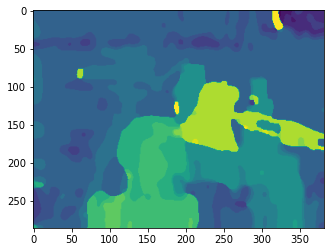

<Figure size 432x288 with 0 Axes>

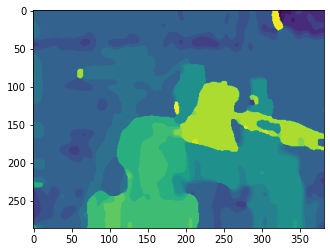

<Figure size 432x288 with 0 Axes>

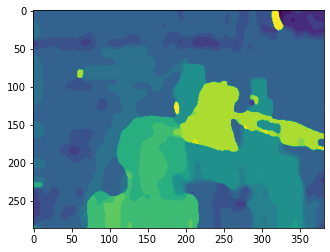

<Figure size 432x288 with 0 Axes>

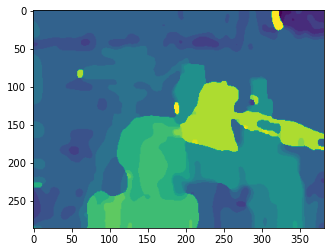

<Figure size 432x288 with 0 Axes>

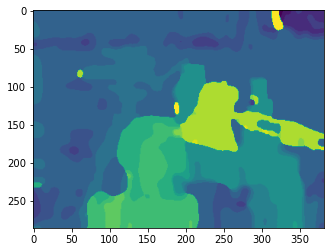

<Figure size 432x288 with 0 Axes>

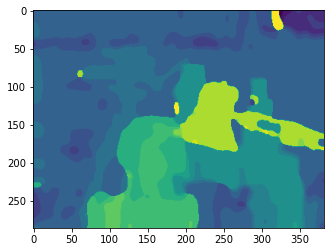

<Figure size 432x288 with 0 Axes>

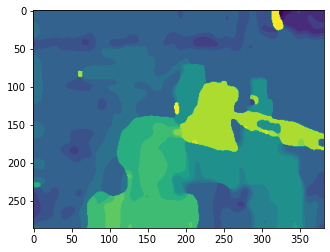

<Figure size 432x288 with 0 Axes>

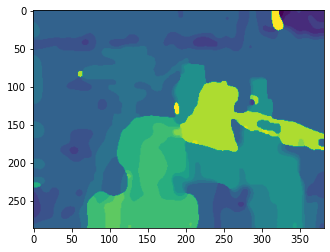

<Figure size 432x288 with 0 Axes>

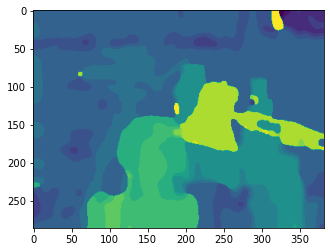

<Figure size 432x288 with 0 Axes>

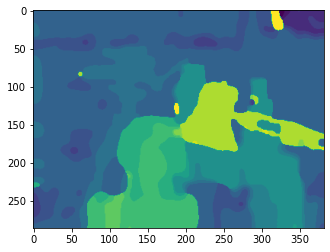

<Figure size 432x288 with 0 Axes>

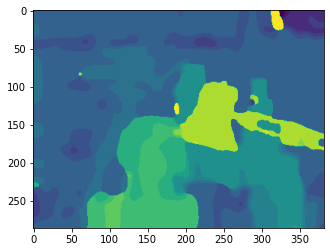

<Figure size 432x288 with 0 Axes>

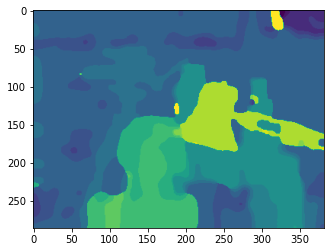

<Figure size 432x288 with 0 Axes>

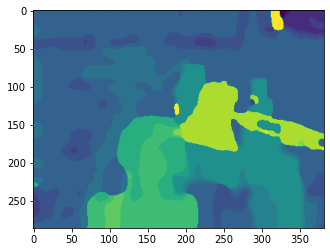

<Figure size 432x288 with 0 Axes>

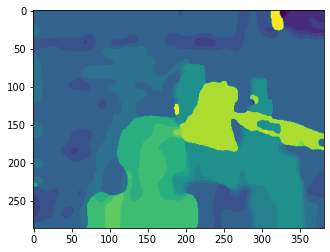

<Figure size 432x288 with 0 Axes>

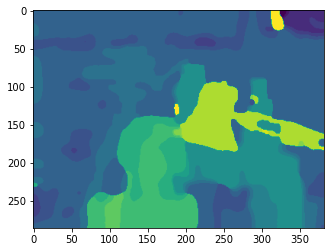

<Figure size 432x288 with 0 Axes>

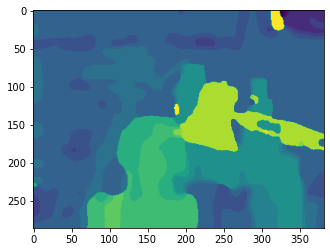

<Figure size 432x288 with 0 Axes>

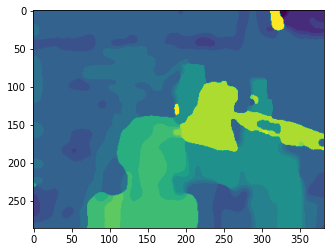

<Figure size 432x288 with 0 Axes>

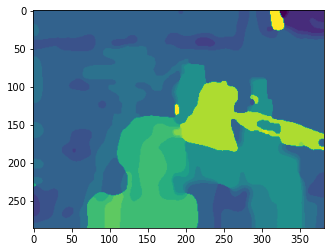

<Figure size 432x288 with 0 Axes>

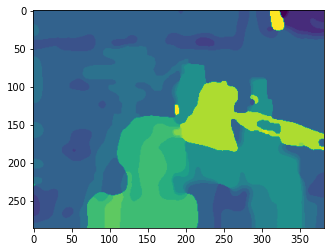

<Figure size 432x288 with 0 Axes>

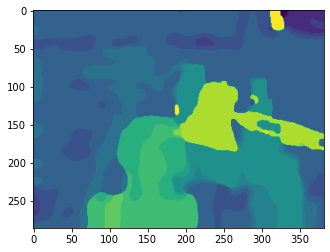

<Figure size 432x288 with 0 Axes>

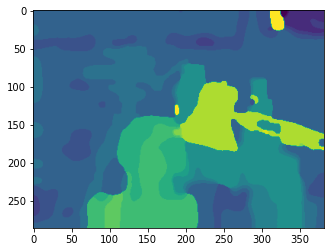

<Figure size 432x288 with 0 Axes>

In [22]:
for i in range(howmany):
    pass_messages(UP)
    pass_messages(LEFT)
    pass_messages(DOWN)
    pass_messages(RIGHT)
    matplotlib.pyplot.imshow(calc_belief())
    matplotlib.pyplot.figure()
    matplotlib.pyplot.show()

In [23]:
a.shape

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
matplotlib.pyplot.imshow(a)

In [ ]:
matplotlib.pyplot.show()